In [1]:
%load_ext autoreload
%autoreload 2
import pangolin
from pangolin import transforms
from pangolin.interface import *
from pangolin import new_infer as infer

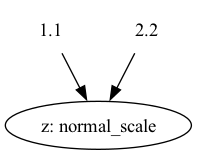

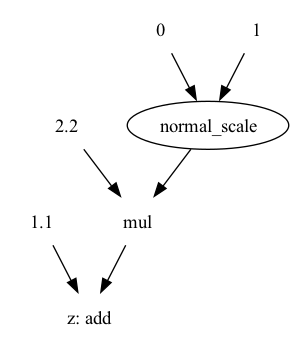

In [2]:
a = makerv(1.1)
b = makerv(2.2)
z = normal_scale(a, b)
rule = transforms.NonCenteredNormalTransformationRule()
r = rule.apply(z)
display(viz_upstream(z,[],{z:'z'}))
display(viz_upstream(r,[],{r[z]:'z'}))

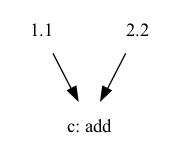

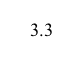

In [3]:
a = makerv(1.1)
b = makerv(2.2)
c = a+b
display(viz_upstream(c,[],{c:'c'}))
rule = transforms.ConstantOpTransformationRule()
r = rule.apply(c)

display(viz_upstream(r[c]))

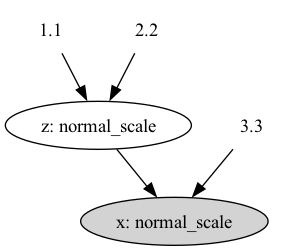

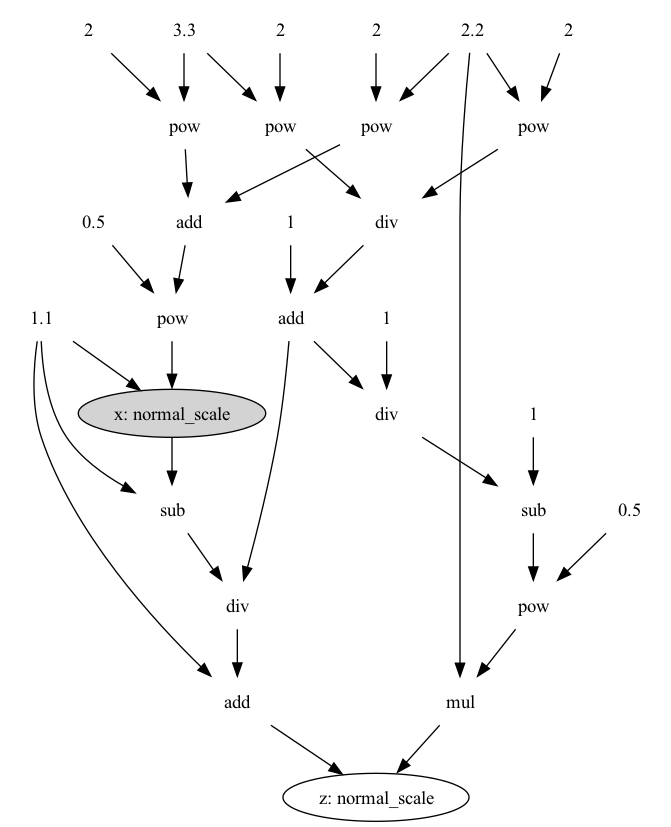

In [4]:
a = makerv(1.1)
b = makerv(2.2)
c = makerv(3.3)
z = normal_scale(a, b)
x = normal_scale(z, c)
rule = transforms.NormalNormalTransformationRule()
r = rule.apply(x, [x])
display(viz_upstream(x,[x],{x:'x',z:'z'}))
display(viz_upstream(r,[r[x]],{r[x]:'x',r[z]:'z'}))

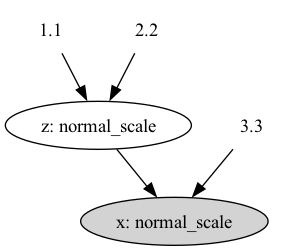

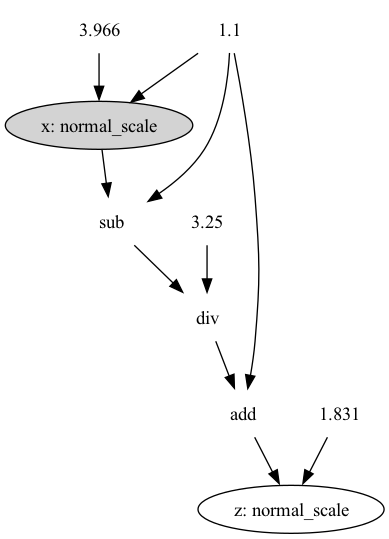

2.454719
2.4529545


In [5]:
a = makerv(1.1)
b = makerv(2.2)
c = makerv(3.3)
z = normal_scale(a, b)
x = normal_scale(z, c)
display(viz_upstream(x,[x],{x:'x',z:'z'}))
[new_x, new_z] = transforms.simplify([x, z],[x])
display(viz_upstream([new_x, new_z],[new_x],{new_x:'x',new_z:'z'}))

print(pangolin.E(z,x,5.5))
print(pangolin.E(new_z,new_x,5.5))

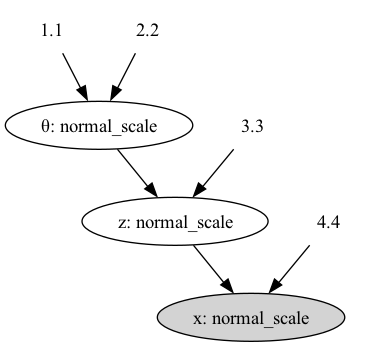

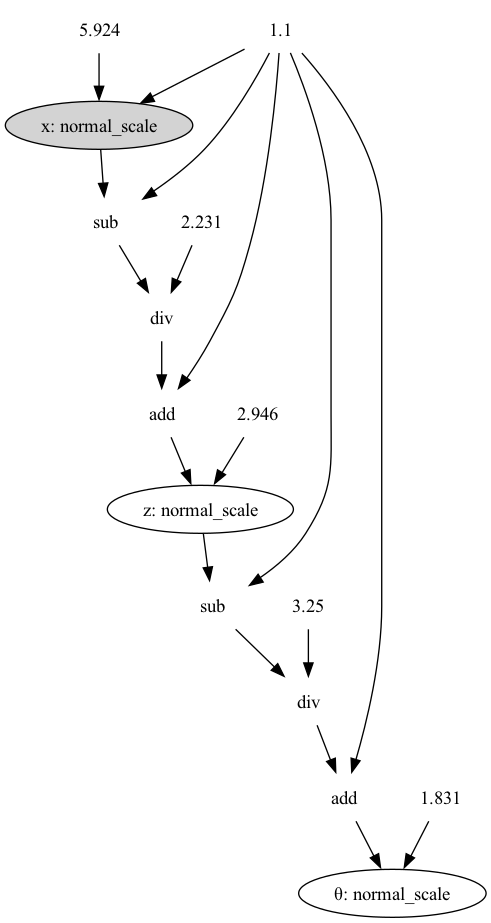

2.3241293
2.3117087
2.5094817
2.5102172


In [6]:
a = makerv(1.1)
b = makerv(2.2)
c = makerv(3.3)
d = makerv(4.4)
θ = normal_scale(a, b)
z = normal_scale(θ, c)
x = normal_scale(z, d)
[new_θ, new_z, new_x] = transforms.simplify([θ, z, x],[x])
display(viz_upstream(x,[x],{θ:'θ',x:'x',z:'z'}))
display(viz_upstream([new_θ, new_z, new_x],[new_x],{new_θ: 'θ', new_x:'x',new_z:'z'}))

print(pangolin.E(θ,x,9.9))
print(pangolin.E(new_θ,new_x,9.9))

print(pangolin.E(z,[θ,x],[3.3,1.1]))
print(pangolin.E(new_z,[new_θ,new_x],[3.3,1.1]))

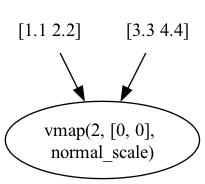

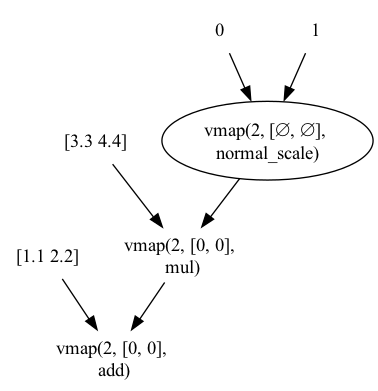

In [7]:
# vmap over both parents
# model
locs = makerv([1.1, 2.2])
scales = makerv([3.3, 4.4])
x = vmap(normal_scale, 0)(locs, scales)
display(viz_upstream(x))
# tform
base_rule = transforms.NonCenteredNormalTransformationRule()
rule = transforms.VMappedTransformationRule(base_rule)
replacements = rule.apply(x)

display(viz_upstream(replacements))

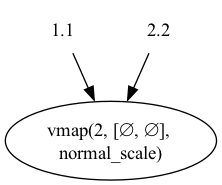

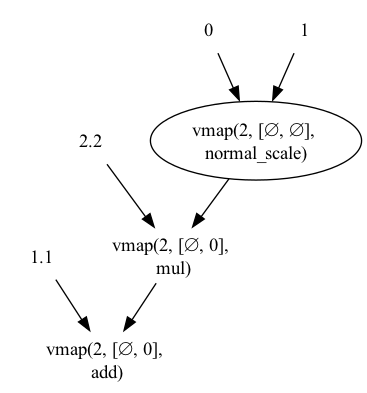

In [8]:
# vmap over neither parent
# model
locs = makerv(1.1)
scales = makerv(2.2)
x = vmap(normal_scale, None, axis_size=2)(locs, scales)
display(viz_upstream(x))
# tform
base_rule = transforms.NonCenteredNormalTransformationRule()
rule = transforms.VMappedTransformationRule(base_rule)
replacements = rule.apply(x)

display(viz_upstream(replacements))

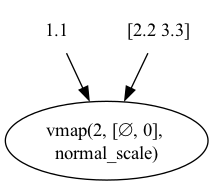

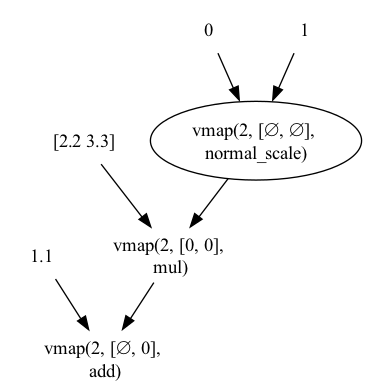

In [9]:
# vmap over scale only
# model
loc = makerv(1.1)
scales = makerv([2.2, 3.3])
x = vmap(normal_scale, (None, 0))(loc, scales)
display(viz_upstream(x))
# tform
base_rule = transforms.NonCenteredNormalTransformationRule()
rule = transforms.VMappedTransformationRule(base_rule)
#tform = rule.get_transform(x.cond_dist)
replacements = rule.apply(x)
display(viz_upstream(replacements))

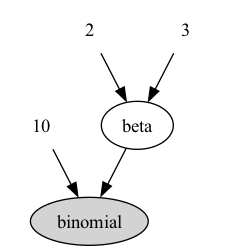

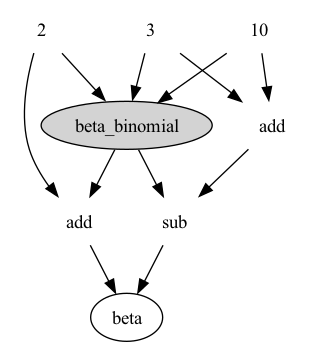

In [10]:
a = 2
b = 3
n = 10
z = beta(a, b)
x = binomial(n, z)
rule = transforms.BetaBinomialTransformationRule()
replacements = rule.apply(x, [x])

display(viz_upstream(x, [x]))
display(viz_upstream(replacements[z],[replacements[x]]))

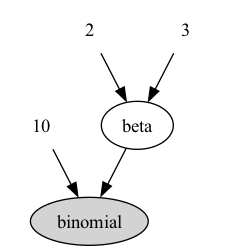

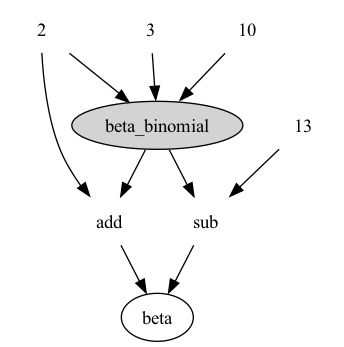

In [11]:
a = 2
b = 3
n = 10
z = beta(a, b)
x = binomial(n, z)
#rule = transforms.BetaBinomialTransformationRule()
#replacements = rule.apply(x, [x])
[new_x, new_z] = transforms.simplify([x,z],[x])

display(viz_upstream(x, [x]))
display(viz_upstream(new_z, [new_x]))

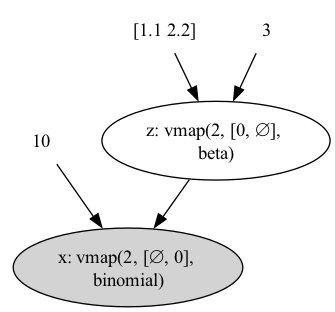

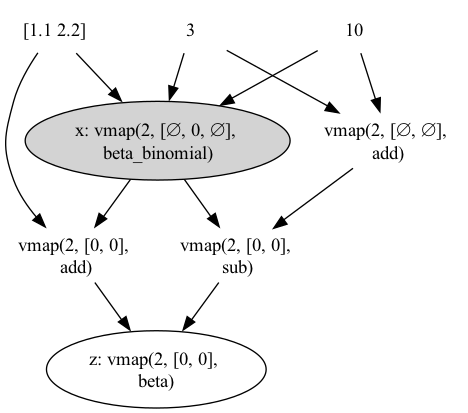

[0.43225583 0.2765189 ]
cond_dist=VMapDist(base_cond_dist=beta)
rng_key=Traced<ShapedArray(uint32[2])>with<BatchTrace(level=1/0)> with
  val = Array([[ 810718623, 2243343912],
       [ 592308663,  655862904],
       [3807365615, 4268308487],
       ...,
       [2545438682,  596901087],
       [ 321358321, 1890802709],
       [2391702870, 3919351833]], dtype=uint32)
  batch_dim = 0
parent_vals=(Array([6.1, 4.2], dtype=float32), Array([ 8, 11], dtype=int32))
[0.4319229 0.2764798]


In [12]:
a = makerv([1.1, 2.2])
b = 3
n = 10
z = vmap(beta, (0, None))(a, b)
x = vmap(binomial, (None, 0))(n, z)
display(viz_upstream(x,[x],{x:'x',z:'z'}))
# transform
base_rule = transforms.BetaBinomialTransformationRule()
rule = transforms.VMappedTransformationRule(base_rule)
replacements = rule.apply(x, [x])
new_z = replacements[z]
new_x = replacements[x]
display(viz_upstream(replacements,[new_x],{new_x:'x',
                                               new_z:'z'}))

print(pangolin.E(z,[x],[np.array([5,2])]))
print(pangolin.E(new_z,[new_x],[np.array([5,2])]))

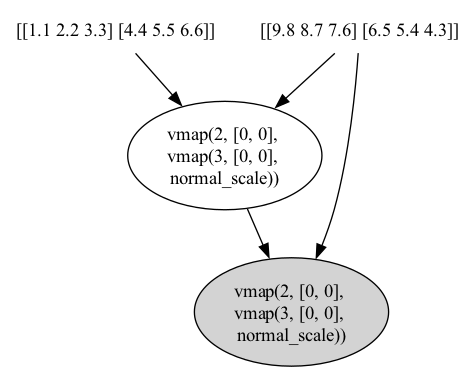

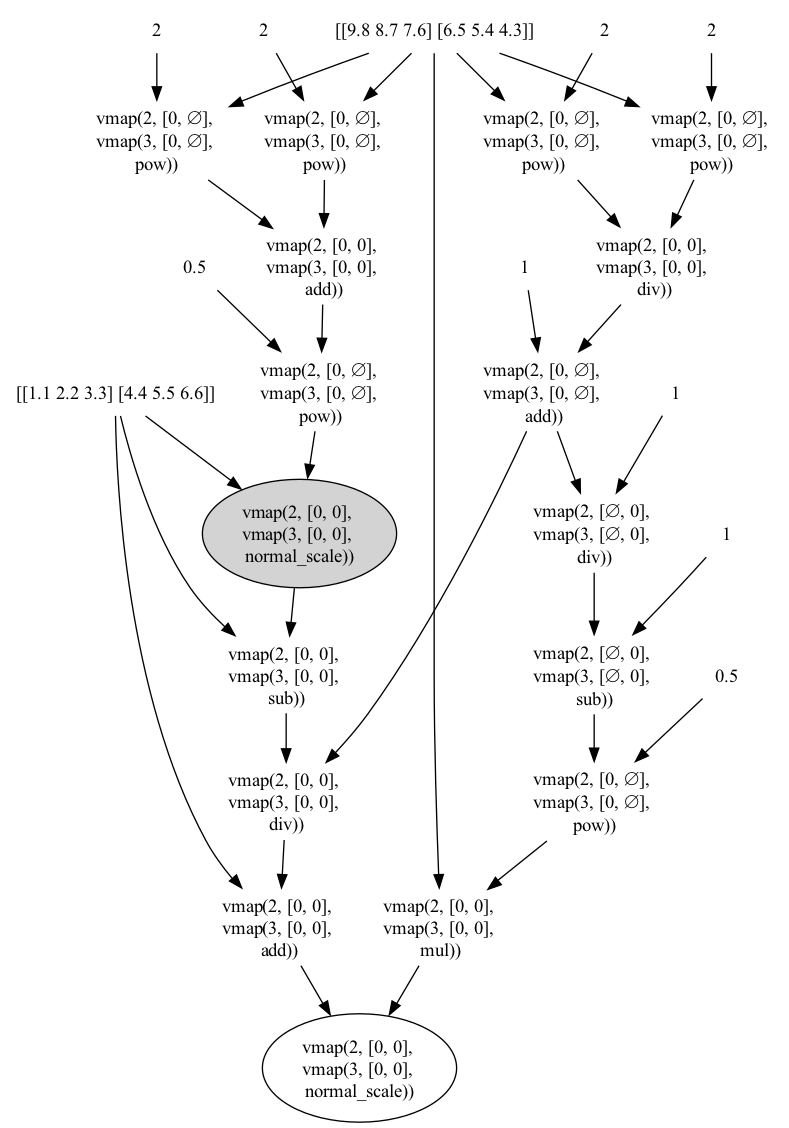

In [13]:
double_normal = vmap(vmap(normal_scale, 0), 0)
locs = makerv([[1.1, 2.2, 3.3], [4.4, 5.5, 6.6]])
scales = makerv([[9.8, 8.7, 7.6], [6.5, 5.4, 4.3]])
z = double_normal(locs, scales)
x = double_normal(z, scales)
display(viz_upstream(x,[x]))

base_rule1 = transforms.NormalNormalTransformationRule()
base_rule2 = transforms.VMappedTransformationRule(base_rule1)
rule2 = transforms.VMappedTransformationRule(base_rule2)
replacements = rule2.apply(x,[x])

new_z = replacements[z]
new_x = replacements[x]

display(viz_upstream(new_z, [new_x]))

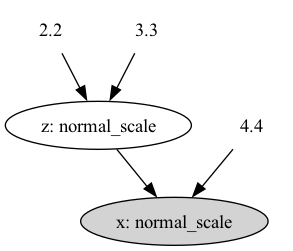

In [14]:
a = 2.2
b = 3.3
c = 4.4
z = normal(makerv(a),makerv(b))
x = normal(z,makerv(c))
viz_upstream(x,[x],{z:'z',x:'x'})

original model


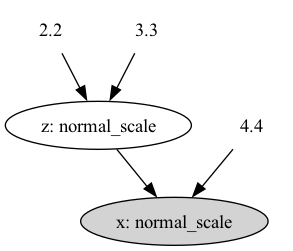

normal-normal transformed


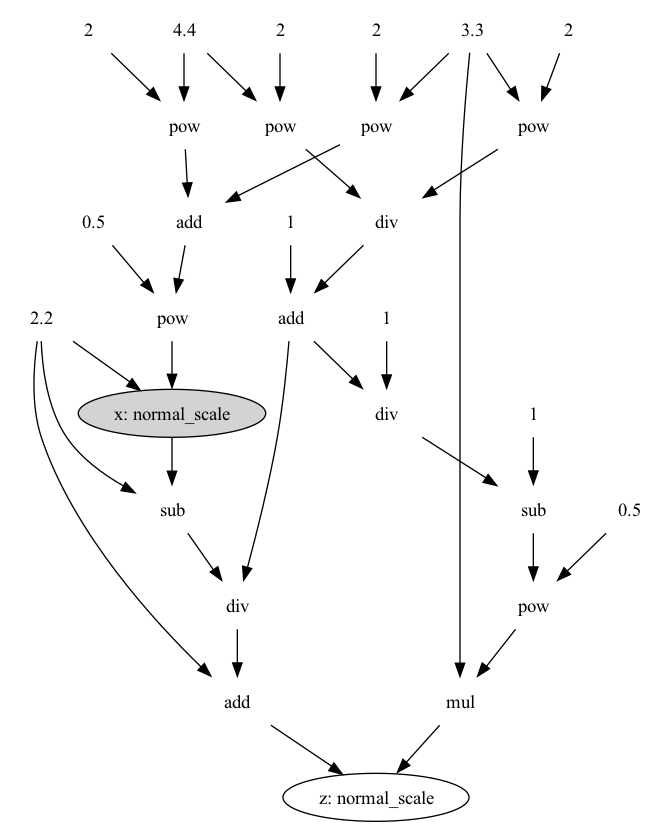

previous graph constant-op transformed


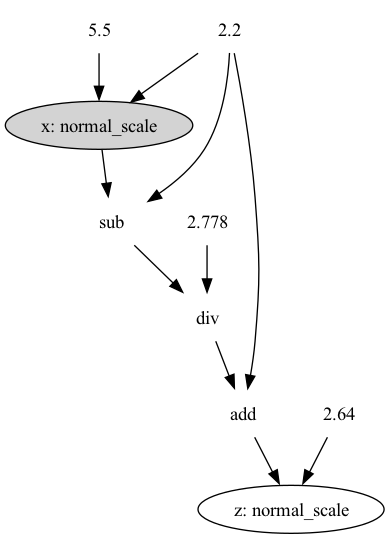

normal-normal and constant-op transformed together


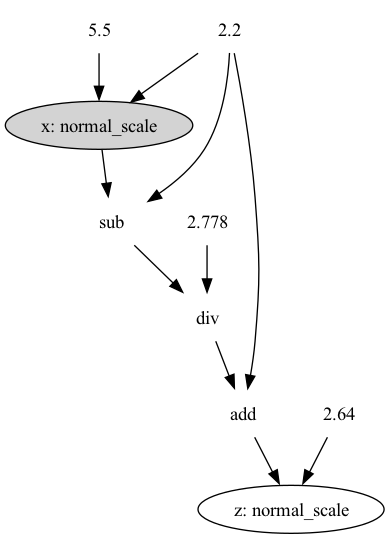

In [15]:
a = 2.2
b = 3.3
c = 4.4
z = normal(a,b)
x = normal(z,c)

print('original model')
display(viz_upstream(x,[x],{z:'z',x:'x'}))

t1 = transforms.NormalNormalTransformationRule()
[new_z, new_x] = transforms.apply_transformation_rules([z,x],[t1],[x])
print('normal-normal transformed')
display(viz_upstream([new_z, new_x],[new_x],{new_z:'z',new_x:'x'}))

t2 = transforms.ConstantOpTransformationRule()
[new_z2, new_x2] = transforms.apply_transformation_rules([new_z,new_x],[t2],[new_x])
print('previous graph constant-op transformed')
display(viz_upstream([new_z2, new_x2],[new_x2],{new_z2:'z',new_x2:'x'}))

t2 = transforms.ConstantOpTransformationRule()
[new_z2, new_x2] = transforms.apply_transformation_rules([z,x],[t1,t2],[x])
print('normal-normal and constant-op transformed together')
display(viz_upstream([new_z2, new_x2],[new_x2],{new_z2:'z',new_x2:'x'}))

original model


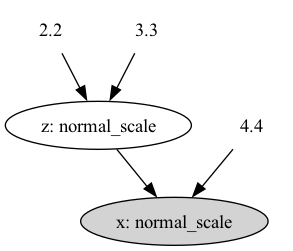

AttributeError: module 'pangolin.new_infer' has no attribute 'NormalNormalTransformationRule'

In [16]:
a = 2.2
b = 3.3
c = 4.4
z = normal(a,b)
x = normal(z,c)

print('original model')
display(viz_upstream(x,[x],{z:'z',x:'x'}))

t1 = infer.NormalNormalTransformationRule
[new_z, new_x] = infer.apply_transformation_rules([z,x],[t1],[x])
print('normal-normal transformed')
display(viz_upstream([new_z, new_x],[new_x],{new_z:'z',new_x:'x'}))

t2 = infer.ConstantOpTransformationRule
[new_z2, new_x2] = infer.apply_transformation_rules([new_z,new_x],[t2],[new_x])
print('previous graph constant-op transformed')
display(viz_upstream([new_z2, new_x2],[new_x2],{new_z2:'z',new_x2:'x'}))

t2 = infer.ConstantOpTransformationRule
[new_z2, new_x2] = infer.apply_transformation_rules([z,x],[t1,t2],[x])
print('normal-normal and constant-op transformed together')
display(viz_upstream([new_z2, new_x2],[new_x2],{new_z2:'z',new_x2:'x'}))

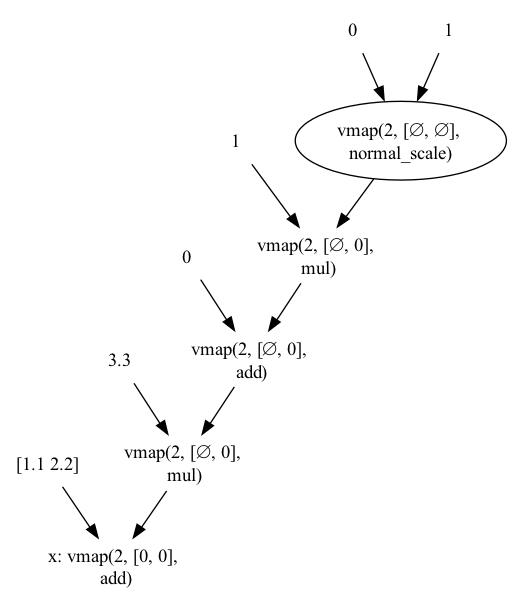

In [17]:
locs = makerv([1.1,2.2])
scales = makerv(3.3)
vec_normal = vmap(normal_scale,(0,None))
x = vec_normal(locs,scales)
t0 = transforms.NonCenteredNormalTransformationRule()
t = transforms.VMappedTransformationRule(t0)
#t.check(x,observed_vars=[x])
#extracted = t.extract(x)
#new_x, *new_pars = t.apply(x, *extracted)
[new_x] = transforms.apply_transformation_rules([x],[t],[x],max_iter=2)
viz_upstream([new_x],(),{new_x:'x'})
#infer.sample(new_x,niter=10)

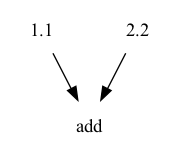

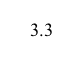

In [18]:
a = makerv(1.1)
b = makerv(2.2)
x = a+b
rule = transforms.ConstantOpTransformationRule()
display(viz_upstream(x))
new_x = transforms.apply_transformation_rules([x],[rule],[])
display(viz_upstream(new_x))

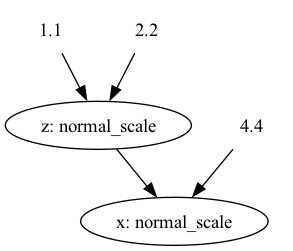

AttributeError: 'list' object has no attribute 'parents'

In [19]:

z = normal(a,b)
x = normal(z,c)

display(viz_upstream(x,[],{x:'x',z:'z'}))

t = transforms.NormalNormalTransformationRule()
[new_x, new_z] = t.apply([x.parents,z.parents],[x.parents,z.parents])

display(viz_upstream(new_z,[],{new_x:'x',new_z:'z'}))

In [ ]:

t0 = transforms.NonCenteredNormalTransformationRule()
t = transforms.VMappedTransformationRule(t0)

locs = makerv([1.1,2.2])
scales = makerv([3.3,4.4])
x = vmap(normal_scale, 0, axis_size=2)(locs, scales)
display(viz_upstream(x))

[new_x] = t.apply((x.cond_dist,),(x.parents,))
display(viz_upstream(new_x))

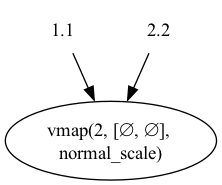

AttributeError: 'tuple' object has no attribute 'parents'

In [20]:

t0 = transforms.NonCenteredNormalTransformationRule()
t = transforms.VMappedTransformationRule(t0)

x = vmap(normal_scale, None, axis_size=2)(1.1,2.2)
display(viz_upstream(x))

[new_x] = t.apply((x.cond_dist,),(x.parents,))

display(viz_upstream(new_x))

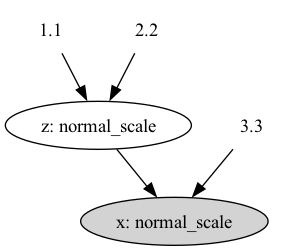

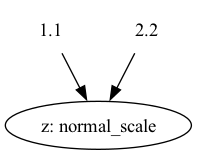

In [21]:
a = makerv(1.1)
b = makerv(2.2)
c = makerv(3.3)
z = normal_scale(a, b)
x = normal_scale(z, c)
rule = transforms.NormalNormalTransformationRule()

[new_x, new_z] = transforms.apply_transformation_rules([x,z],[rule])

#r = rule.apply(x)
display(viz_upstream(x,[x],{x:'x',z:'z'}))
display(viz_upstream(new_z,[new_x],{new_x:'x',new_z:'z'}))

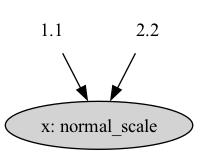

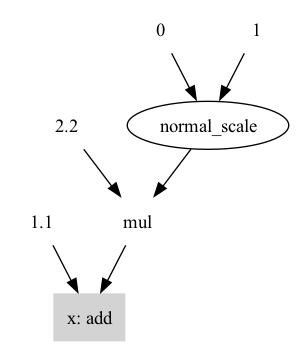

In [22]:
a = makerv(1.1)
b = makerv(2.2)
x = normal_scale(a, b)
rule1 = transforms.NonCenteredNormalTransformationRule()
rule2 = transforms.NormalNormalTransformationRule()

[new_x] = transforms.apply_transformation_rules([x],[rule1,rule2],max_iter=1)

display(viz_upstream(x,[x],{x:'x'}))
display(viz_upstream([new_x],[new_x],{new_x:'x'}))

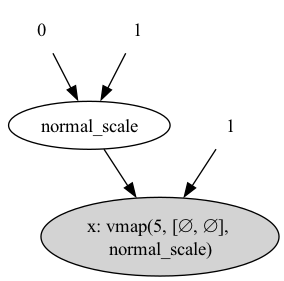

In [23]:
# in a "normal/normal" model, can we get answers "in closed form"?

z = normal(0,1)
x = plate(N=5)(lambda: normal(z,1))
x_obs = np.random.randn(5)
display(viz_upstream(x,[x],{x:'x'}))

rule1 = transforms.NormalNormalTransformationRule()
rule2 = transforms.VMappedTransformationRule(rule1)

new_x, new_z = transforms.apply_transformation_rules([x, z],[rule2])

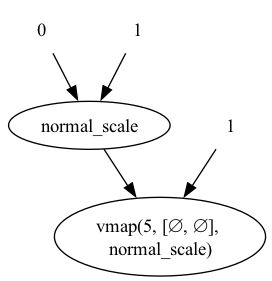

In [24]:
viz_upstream(new_x)

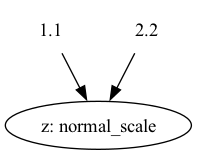

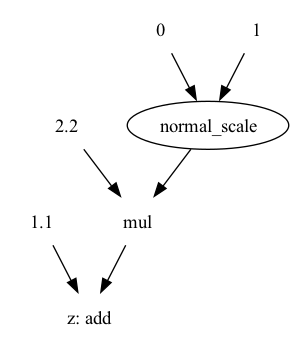

In [1]:
%load_ext autoreload
%autoreload 2
import pangolin
from pangolin import transforms
from pangolin.interface import *
from pangolin import new_infer as infer

a = makerv(1.1)
b = makerv(2.2)
z = normal_scale(a, b)
rule = transforms.NonCenteredNormalTform()
r = rule.apply(z)
display(viz_upstream(z,[],{z:'z'}))
display(viz_upstream(r,[],{r[z]:'z'}))

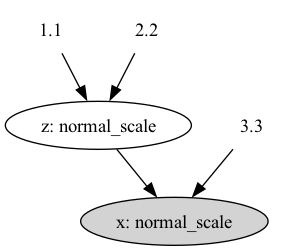

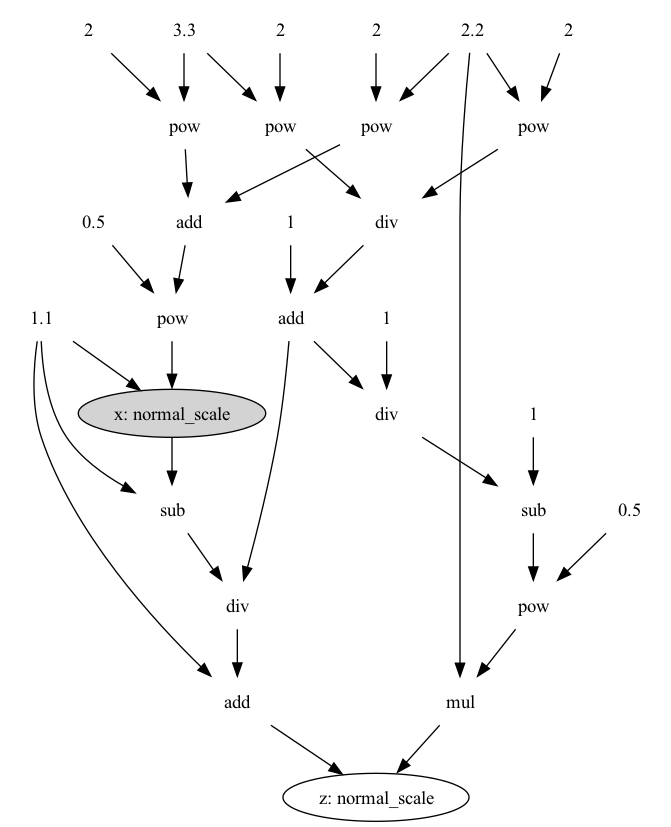

In [2]:
a = makerv(1.1)
b = makerv(2.2)
c = makerv(3.3)
z = normal_scale(a, b)
x = normal_scale(z, c)
rule = transforms.NormalNormalTform()
r = rule.apply(x,[x])
display(viz_upstream(x,[x],{z:'z',x:'x'}))
display(viz_upstream(r,[r[x]],{r[z]:'z',r[x]:'x'}))

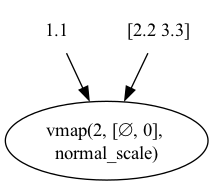

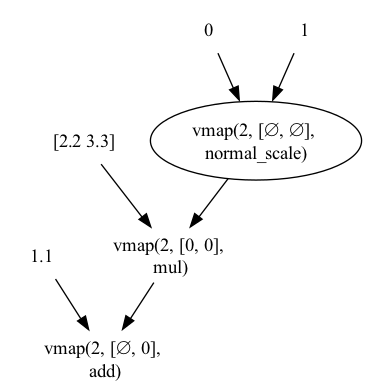

In [3]:
# vmap over scale only
# model
loc = makerv(1.1)
scales = makerv([2.2, 3.3])
x = vmap(normal_scale, (None, 0))(loc, scales)
display(viz_upstream(x))
# tform
base_tform = transforms.NonCenteredNormalTform()
tform = transforms.VMappedTform(base_tform)
#tform = rule.get_transform(x.cond_dist)
replacements = tform.apply(x)
display(viz_upstream(replacements))

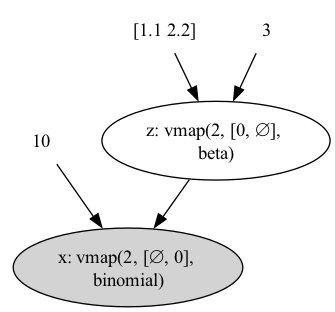

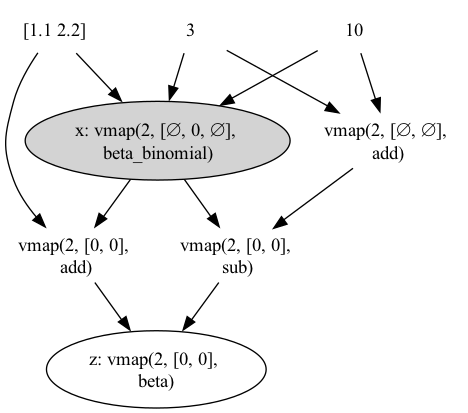

[0.43285435 0.27588332]
cond_dist=VMapDist(base_cond_dist=beta)
rng_key=Traced<ShapedArray(uint32[2])>with<BatchTrace(level=1/0)> with
  val = Array([[ 709387140,  234266706],
       [3649088629,  796109220],
       [1460152880,  565489858],
       ...,
       [ 904368036, 2990831877],
       [3293812194,  176672922],
       [1798243773, 3092832326]], dtype=uint32)
  batch_dim = 0
parent_vals=(Array([6.1, 4.2], dtype=float32), Array([ 8, 11], dtype=int32))
[0.43208417 0.27666223]


In [4]:
a = makerv([1.1, 2.2])
b = 3
n = 10
z = vmap(beta, (0, None))(a, b)
x = vmap(binomial, (None, 0))(n, z)
display(viz_upstream(x,[x],{x:'x',z:'z'}))
# transform
base_tform = transforms.BetaBinomialTform()
tform = transforms.VMappedTform(base_tform)
replacements = tform.apply(x, [x])
new_z = replacements[z]
new_x = replacements[x]
display(viz_upstream(replacements,[new_x],{new_x:'x',
                                               new_z:'z'}))

print(pangolin.E(z,[x],[np.array([5,2])]))
print(pangolin.E(new_z,[new_x],[np.array([5,2])]))

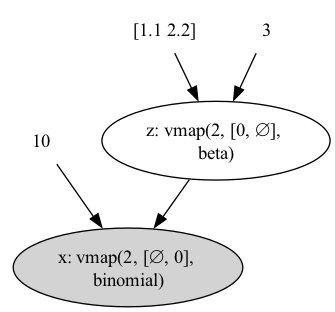

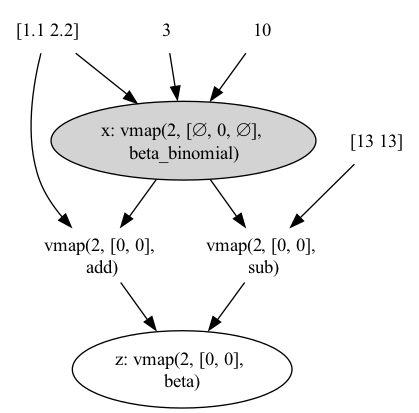

In [9]:
a = makerv([1.1, 2.2])
b = 3
n = 10
z = vmap(beta, (0, None))(a, b)
x = vmap(binomial, (None, 0))(n, z)
display(viz_upstream(x,[x],{x:'x',z:'z'}))
new_x, new_z = transforms.simplify([x,z],[x])
display(viz_upstream([new_x,new_z],[new_x],{new_x:'x',
                                               new_z:'z'}))

original model


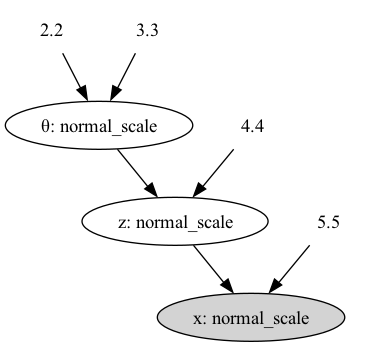

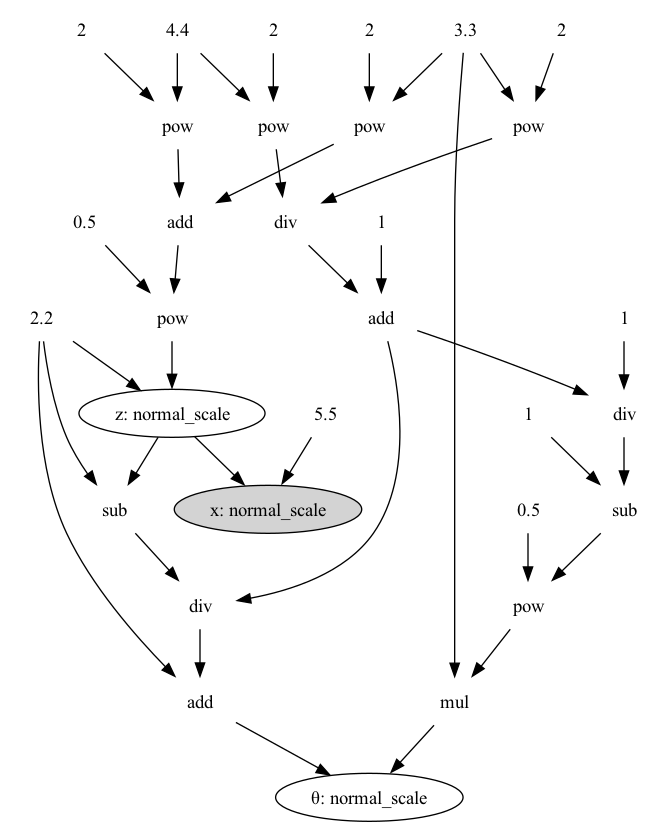

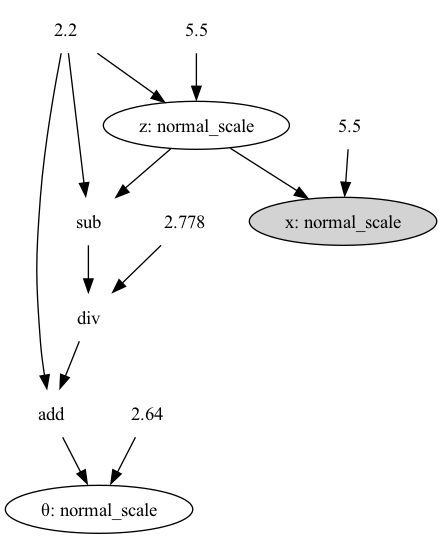

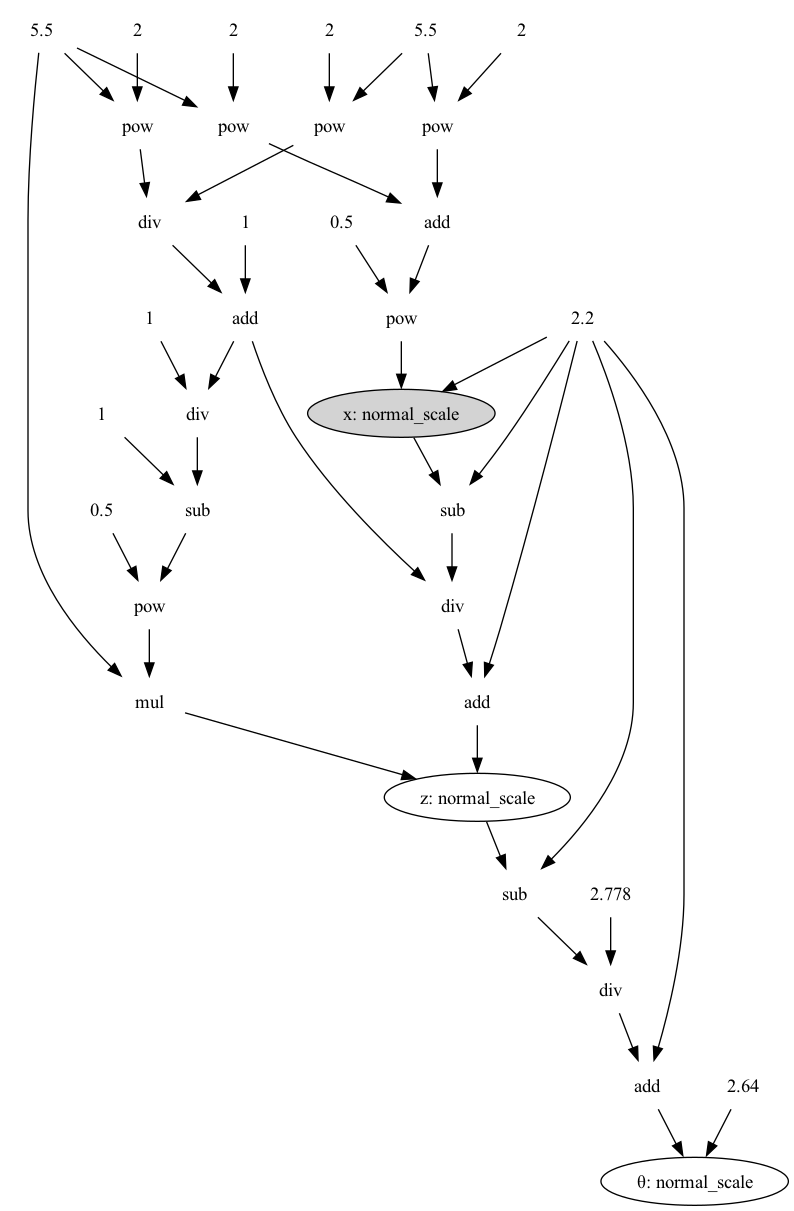

In [21]:
a = 2.2
b = 3.3
c = 4.4
d = 5.5
θ = normal(a,b)
z = normal(θ,c)
x = normal(z,d)

print('original model')
display(viz_upstream([θ,z,x],[x],{θ:'θ',z:'z',x:'x'}))

[θ2, z2, x2] = transforms.simplify([θ,z,x],[x],1)

display(viz_upstream([θ2,x2,z2],[x2],{θ2:'θ',z2:'z',x2:'x'}))

[θ2, z2, x2] = transforms.simplify([θ,z,x],[x],13)

display(viz_upstream([θ2,x2,z2],[x2],{θ2:'θ',z2:'z',x2:'x'}))

[θ2, z2, x2] = transforms.simplify([θ,z,x],[x],14)

display(viz_upstream([θ2,x2,z2],[x2],{θ2:'θ',z2:'z',x2:'x'}))

# t1 = transforms.NormalNormalTransformationRule()
# [new_z, new_x] = transforms.apply_transformation_rules([z,x],[t1],[x])
# print('normal-normal transformed')
# display(viz_upstream([new_z, new_x],[new_x],{new_z:'z',new_x:'x'}))
#
# t2 = transforms.ConstantOpTransformationRule()
# [new_z2, new_x2] = transforms.apply_transformation_rules([new_z,new_x],[t2],[new_x])
# print('previous graph constant-op transformed')
# display(viz_upstream([new_z2, new_x2],[new_x2],{new_z2:'z',new_x2:'x'}))
#
# t2 = transforms.ConstantOpTransformationRule()
# [new_z2, new_x2] = transforms.apply_transformation_rules([z,x],[t1,t2],[x])
# print('normal-normal and constant-op transformed together')
# display(viz_upstream([new_z2, new_x2],[new_x2],{new_z2:'z',new_x2:'x'}))